In [1]:
from shifter import *

In [2]:
def show(elements,transpose=False,big=False):
    if big:
        plt.figure(figsize=(10,20))
    else:
        plt.figure()
    if transpose:
        plt.imshow(elements.transpose())
    else:
        plt.imshow(elements)
    #plt.colorbar()
    plt.grid(b=None)
    plt.show(block=False)
    

In [3]:
W = np.load('conn1.npy')

In [4]:
def test_h(h0, amb=False):
    np.random.seed(42)
    V1, V2, V3, Vt, aN, pW, p, pA  = combine_shifter_PCRN(W, num_samples=1,hExt0=h0,ambiguous=amb,verbose=False)
    #show(W_extended)
    show(Vt, transpose=True,big=True)
    
    plt.figure(figsize=(10,3))
    window=5
    plt.plot(np.convolve(aN[0,:], np.ones(window)/window))
    plt.plot(np.convolve(aN[1,:], np.ones(window)/window))
    plt.plot(np.convolve(aN[2,:], np.ones(window)/window))
    plt.plot(np.convolve(np.sum(Vt[:,351:],axis=1), np.ones(window)/window))
    plt.show()
    
    plt.figure(figsize=(8,5))
    tot = {str(i+1): p[0,i] for i in range(3)}
    #tot['inhi'] = np.sum(Vt[:,351:])/1000
    plt.bar(tot.keys(),tot.values())
    plt.title('Time winning')
    plt.show()
    
    plt.figure(figsize=(8,5))
    plt.bar([1,2,3],pA[0])
    plt.title('Average activation when winning')
    plt.show()

    print('Mean activation when winning:', pA[0])
    print('mean win / hExt0:', np.mean(pA)/h0)
    print(V3[-1])
    print(20*'-')

0.1


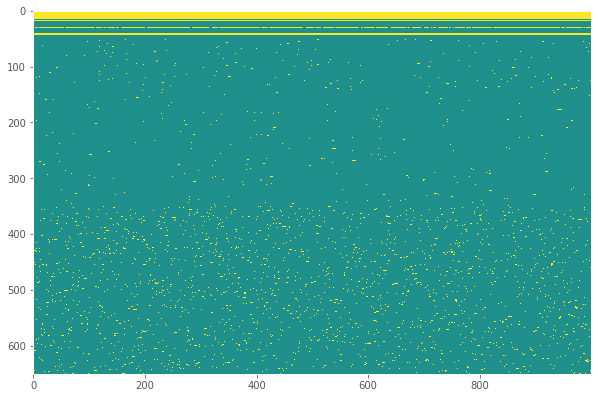

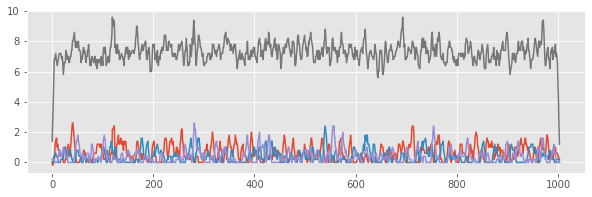

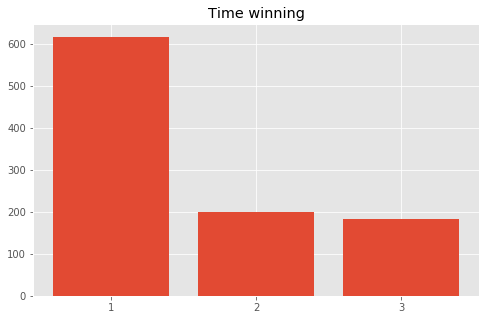

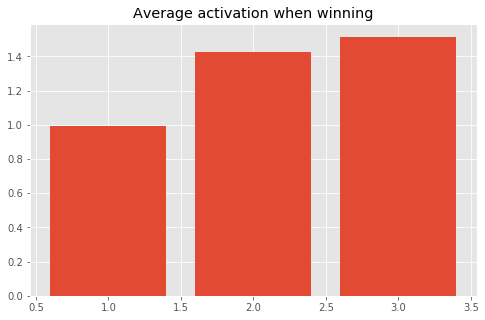

Mean activation when winning: [0.99189627 1.425      1.5136612 ]
mean win / hExt0: 13.10185824823681
[1. 0. 0.]
--------------------
0.15


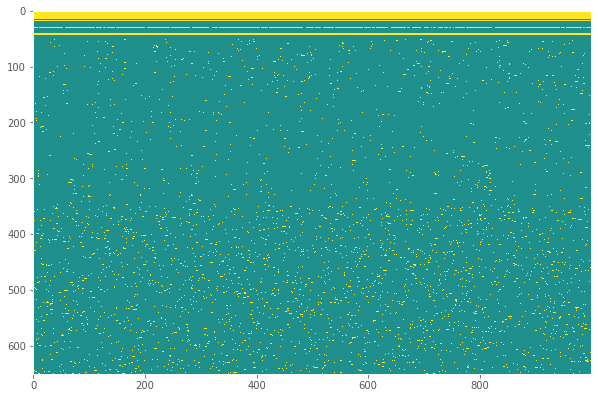

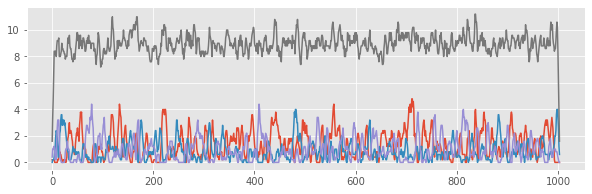

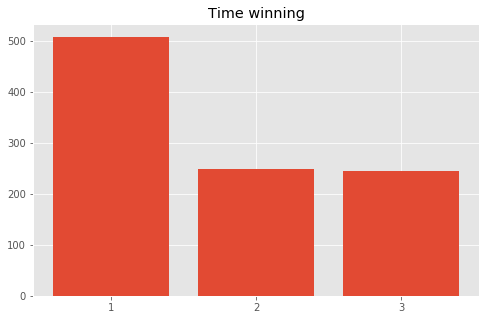

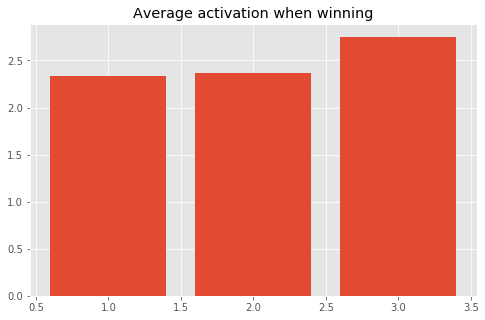

Mean activation when winning: [2.33858268 2.36693548 2.75      ]
mean win / hExt0: 16.567818135636273
[1. 0. 0.]
--------------------
0.2


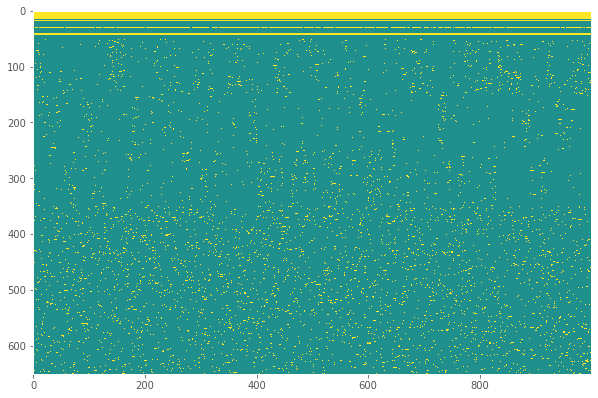

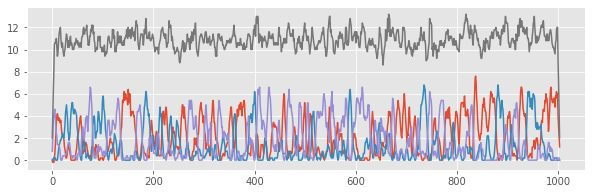

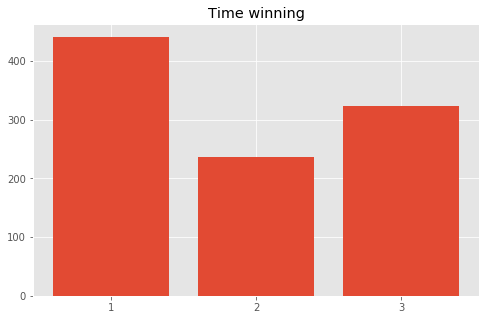

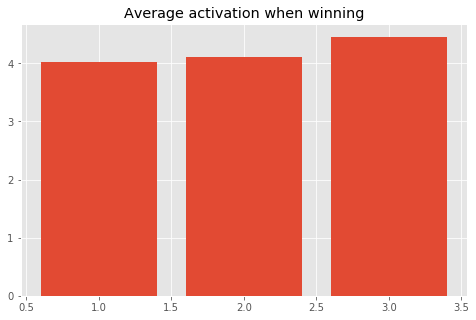

Mean activation when winning: [4.02040816 4.11440678 4.45510836]
mean win / hExt0: 20.983205503432416
[1. 0. 0.]
--------------------
0.27


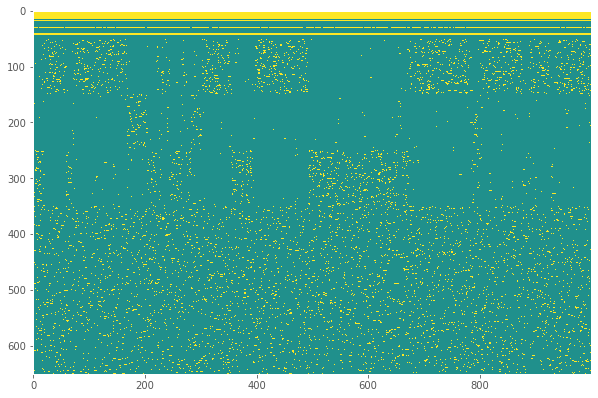

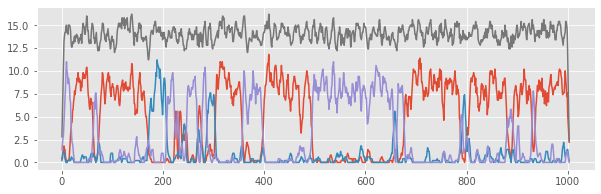

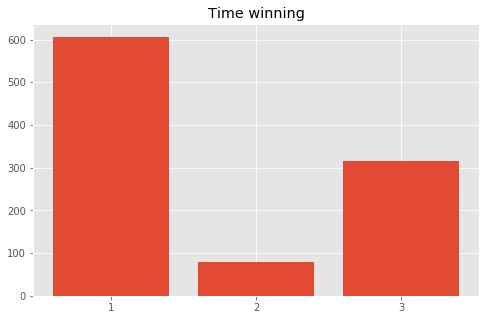

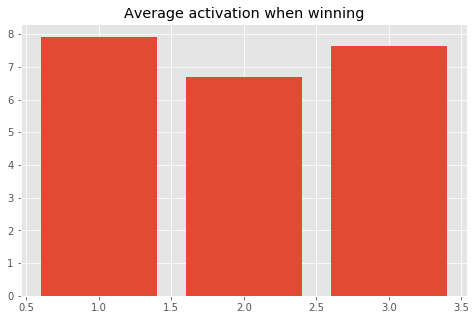

Mean activation when winning: [7.91584158 6.67948718 7.64873418]
mean win / hExt0: 27.46180609982813
[1. 0. 0.]
--------------------
0.3


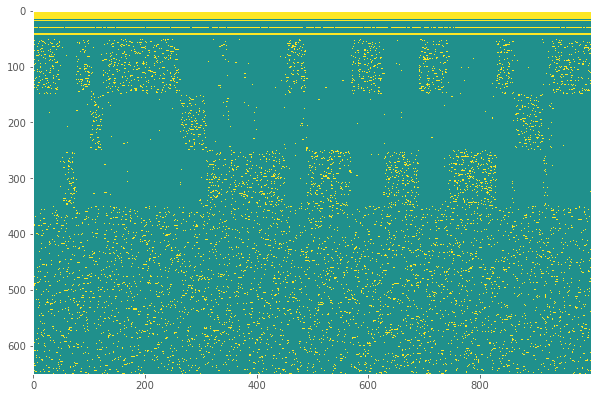

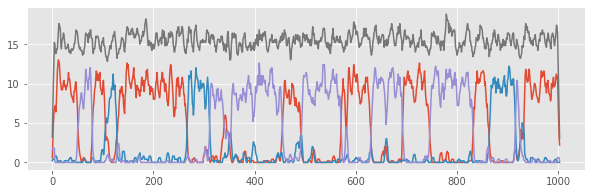

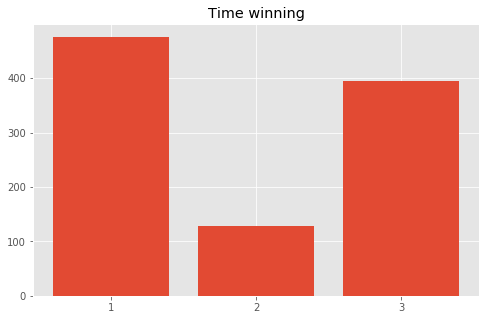

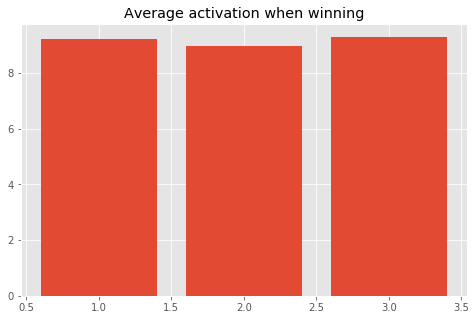

Mean activation when winning: [9.22478992 8.96124031 9.30126582]
mean win / hExt0: 30.541440054254128
[1. 0. 0.]
--------------------
0.32


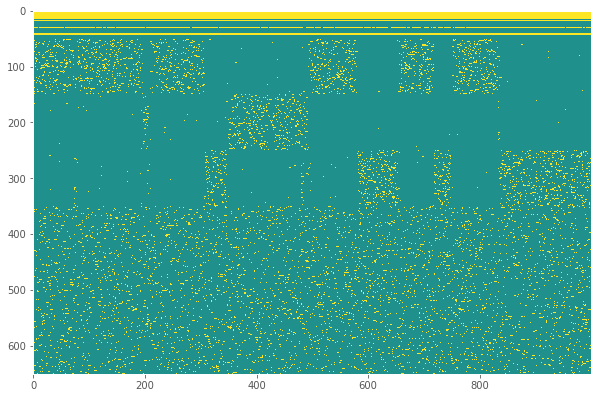

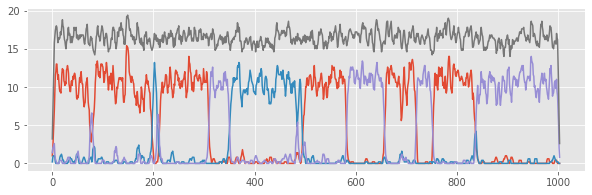

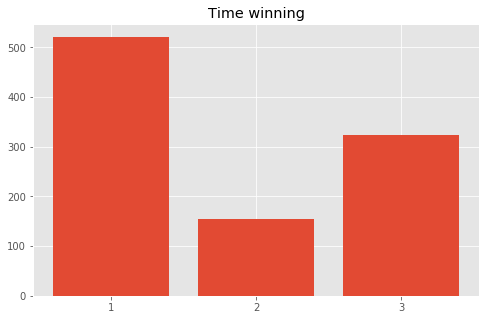

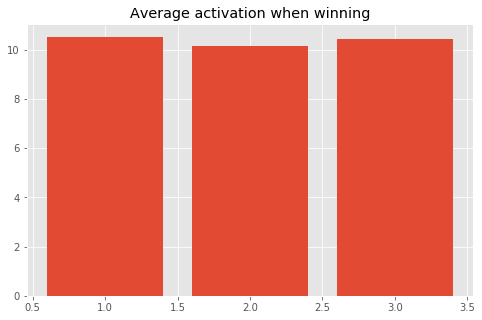

Mean activation when winning: [10.52207294 10.16129032 10.4382716 ]
mean win / hExt0: 32.41836965018665
[1. 0. 0.]
--------------------
0.35


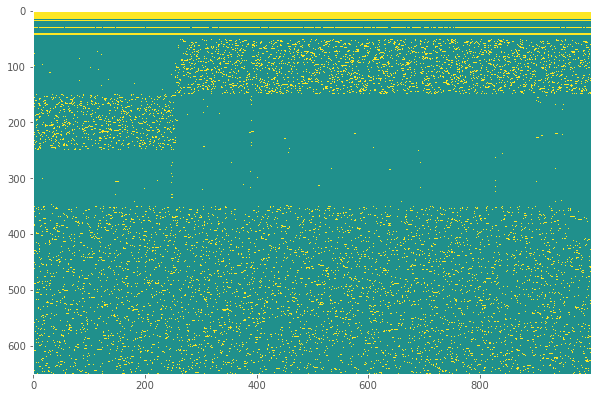

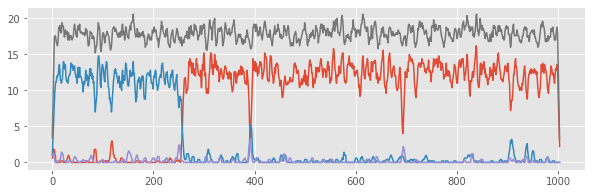

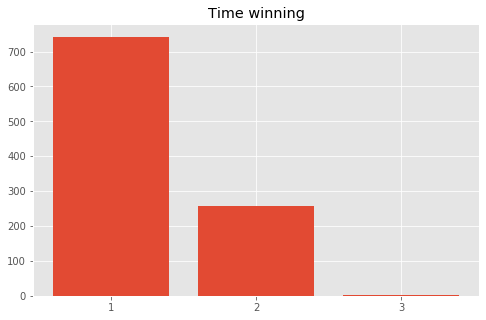

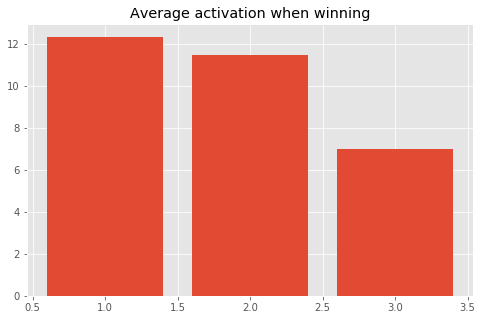

Mean activation when winning: [12.33153639 11.46692607  7.        ]
mean win / hExt0: 29.331869007789596
[1. 0. 0.]
--------------------
0.4


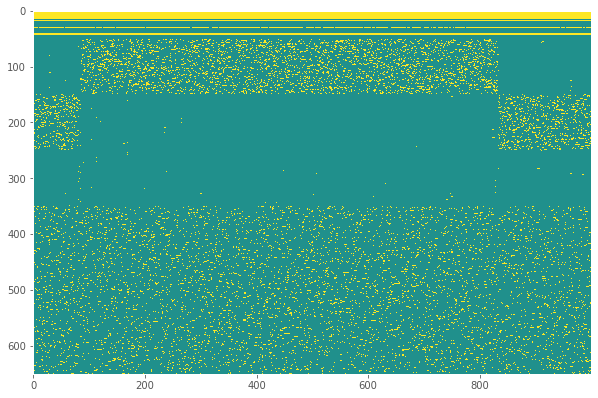

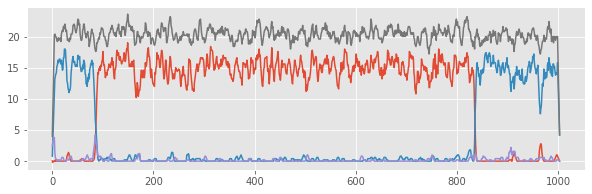

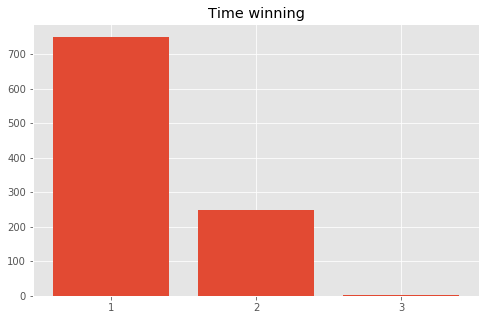

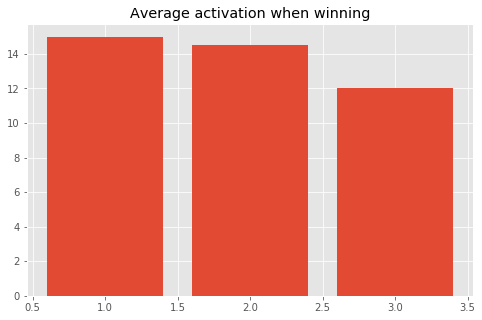

Mean activation when winning: [14.98133333 14.49799197 12.        ]
mean win / hExt0: 34.56610441767069
[1. 0. 0.]
--------------------


In [95]:
for h in [0.10, 0.15, 0.20, 0.27, 0.30, 0.32,0.35, 0.40]:
    print(str(h))
    test_h(h)


In [5]:
def test_h_quiet(h0, seed=42, amb=False):
    print('Base stimulation:', h0)
    np.random.seed(seed)
    V1, V2, V3, Vt, aN, pW, p, pA  = combine_shifter_PCRN(W, num_samples=1,hExt0=h0,verbose=False, ambiguous=amb)
    #print(pA)
    data1.append(pA[0,0])
    data2.append(pA[0,1])
    data3.append(pA[0,2])
    print('Mean activations when winning:', pA[0])
    #print('mean win / hExt0:', np.nanmean(pA)/h0)
    if amb:
        print('Prediction:', np.argmin(p[0]),'/ Label:', np.argmin(V3[-1]))
    else:
        print('Prediction:', np.argmax(p[0]),'/ Label:', np.argmax(V3[-1]))
    print(20*'-')

In [26]:
hExt0_list = np.linspace(0.1,1.0,1000)
data1 = []
data2 = []
data3 = []
for h in hExt0_list:
    test_h_quiet(h)


Base stimulation: 0.1
Mean activations when winning: [0.99189627 1.425      1.5136612 ]
Prediction: 0 / Label: 0
--------------------
Base stimulation: 0.10090090090090091
Mean activations when winning: [0.97288136 1.42211055 1.59241706]
Prediction: 0 / Label: 0
--------------------
Base stimulation: 0.1018018018018018
Mean activations when winning: [0.95796848 1.3681592  1.64035088]
Prediction: 0 / Label: 0
--------------------
Base stimulation: 0.10270270270270271
Mean activations when winning: [0.97969543 1.52173913 1.55445545]
Prediction: 0 / Label: 0
--------------------
Base stimulation: 0.10360360360360361
Mean activations when winning: [1.00537634 1.50485437 1.64830508]
Prediction: 0 / Label: 0
--------------------
Base stimulation: 0.1045045045045045
Mean activations when winning: [1.0088968  1.48051948 1.6763285 ]
Prediction: 0 / Label: 0
--------------------
Base stimulation: 0.10540540540540541
Mean activations when winning: [1.05574913 1.54935622 1.71502591]
Prediction: 0 

Mean activations when winning: [2.33537832 2.32467532 2.82142857]
Prediction: 0 / Label: 0
--------------------
Base stimulation: 0.15045045045045047
Mean activations when winning: [2.2        2.35059761 2.76068376]
Prediction: 0 / Label: 0
--------------------
Base stimulation: 0.15135135135135136
Mean activations when winning: [2.3631068  2.45327103 2.93357934]
Prediction: 0 / Label: 0
--------------------
Base stimulation: 0.15225225225225225
Mean activations when winning: [2.43912176 2.39915966 2.69731801]
Prediction: 0 / Label: 0
--------------------
Base stimulation: 0.15315315315315314
Mean activations when winning: [2.53790614 2.32300885 2.83181818]
Prediction: 0 / Label: 0
--------------------
Base stimulation: 0.15405405405405406
Mean activations when winning: [2.4971537  2.52197802 2.76632302]
Prediction: 0 / Label: 0
--------------------
Base stimulation: 0.15495495495495495
Mean activations when winning: [2.34268537 2.55776892 2.772     ]
Prediction: 0 / Label: 0
---------

Mean activations when winning: [4.02360515 3.79324895 4.35690236]
Prediction: 0 / Label: 0
--------------------
Base stimulation: 0.2
Mean activations when winning: [4.02040816 4.11440678 4.45510836]
Prediction: 0 / Label: 0
--------------------
Base stimulation: 0.2009009009009009
Mean activations when winning: [4.09846827 3.73891626 4.37941176]
Prediction: 0 / Label: 0
--------------------
Base stimulation: 0.2018018018018018
Mean activations when winning: [4.25961538 3.80327869 4.42087542]
Prediction: 0 / Label: 0
--------------------
Base stimulation: 0.20270270270270271
Mean activations when winning: [4.28363636 3.80714286 4.23870968]
Prediction: 0 / Label: 0
--------------------
Base stimulation: 0.2036036036036036
Mean activations when winning: [4.28653846 3.77717391 4.7027027 ]
Prediction: 0 / Label: 0
--------------------
Base stimulation: 0.20450450450450453
Mean activations when winning: [4.41733871 4.02717391 4.6125    ]
Prediction: 0 / Label: 0
--------------------
Base st

Mean activations when winning: [6.5407279  5.424      6.30201342]
Prediction: 0 / Label: 0
--------------------
Base stimulation: 0.24954954954954955
Mean activations when winning: [6.40497336 5.59119497 6.61870504]
Prediction: 0 / Label: 0
--------------------
Base stimulation: 0.25045045045045045
Mean activations when winning: [6.87683824 6.2690583  6.57939914]
Prediction: 0 / Label: 0
--------------------
Base stimulation: 0.25135135135135134
Mean activations when winning: [6.65088757 5.43801653 6.61827957]
Prediction: 0 / Label: 0
--------------------
Base stimulation: 0.25225225225225223
Mean activations when winning: [6.78965517 5.93406593 6.70588235]
Prediction: 0 / Label: 0
--------------------
Base stimulation: 0.2531531531531531
Mean activations when winning: [6.64661654 6.18055556 6.72839506]
Prediction: 0 / Label: 0
--------------------
Base stimulation: 0.25405405405405407
Mean activations when winning: [6.59304703 5.83458647 6.55555556]
Prediction: 0 / Label: 0
----------

Mean activations when winning: [9.4        8.9124424  9.17482517]
Prediction: 0 / Label: 0
--------------------
Base stimulation: 0.2990990990990991
Mean activations when winning: [9.4278607  8.41134752 9.31640625]
Prediction: 0 / Label: 0
--------------------
Base stimulation: 0.30000000000000004
Mean activations when winning: [9.22478992 8.96124031 9.30126582]
Prediction: 0 / Label: 0
--------------------
Base stimulation: 0.30090090090090094
Mean activations when winning: [9.65725806 8.78787879 9.51052632]
Prediction: 0 / Label: 0
--------------------
Base stimulation: 0.30180180180180183
Mean activations when winning: [9.63793103 8.61538462 9.57754011]
Prediction: 0 / Label: 0
--------------------
Base stimulation: 0.3027027027027027
Mean activations when winning: [9.58892128 9.00578035 9.46808511]
Prediction: 0 / Label: 0
--------------------
Base stimulation: 0.3036036036036036
Mean activations when winning: [9.72318339 8.59615385 9.77297297]
Prediction: 0 / Label: 0
------------

Mean activations when winning: [12.11709602 11.28571429 11.44604317]
Prediction: 0 / Label: 0
--------------------
Base stimulation: 0.34774774774774775
Mean activations when winning: [11.68059701 12.01957831  6.        ]
Prediction: 1 / Label: 0
--------------------
Base stimulation: 0.34864864864864864
Mean activations when winning: [12.25776965 11.34722222 11.57805907]
Prediction: 0 / Label: 0
--------------------
Base stimulation: 0.34954954954954953
Mean activations when winning: [12.34983498 11.12359551  6.        ]
Prediction: 0 / Label: 0
--------------------
Base stimulation: 0.3504504504504504
Mean activations when winning: [12.26308901  8.66666667 11.72532189]
Prediction: 0 / Label: 0
--------------------
Base stimulation: 0.3513513513513513
Mean activations when winning: [12.32876712 11.81690141 11.8828125 ]
Prediction: 0 / Label: 0
--------------------
Base stimulation: 0.3522522522522522
Mean activations when winning: [12.37400531 10.86111111 12.25212947]
Prediction: 2 / 

Mean activations when winning: [14.26006192  7.5        14.20148148]
Prediction: 2 / Label: 0
--------------------
Base stimulation: 0.39639639639639646
Mean activations when winning: [        nan 13.80978261 14.46691176]
Prediction: 2 / Label: 0
--------------------
Base stimulation: 0.39729729729729735
Mean activations when winning: [14.77628635 14.31428571 12.        ]
Prediction: 0 / Label: 0
--------------------
Base stimulation: 0.39819819819819824
Mean activations when winning: [14.85226131  9.         12.        ]
Prediction: 0 / Label: 0
--------------------
Base stimulation: 0.39909909909909913
Mean activations when winning: [15.03458213 14.32361963 12.        ]
Prediction: 1 / Label: 0
--------------------
Base stimulation: 0.4
Mean activations when winning: [14.98133333 14.49799197 12.        ]
Prediction: 0 / Label: 0
--------------------
Base stimulation: 0.4009009009009009
Mean activations when winning: [14.88690476 14.42684766 12.        ]
Prediction: 1 / Label: 0
-----

Mean activations when winning: [   nan    nan 16.967]
Prediction: 2 / Label: 0
--------------------
Base stimulation: 0.44594594594594594
Mean activations when winning: [   nan    nan 17.013]
Prediction: 2 / Label: 0
--------------------
Base stimulation: 0.44684684684684683
Mean activations when winning: [   nan    nan 17.213]
Prediction: 2 / Label: 0
--------------------
Base stimulation: 0.4477477477477477
Mean activations when winning: [17.08792846 16.77777778 16.98947368]
Prediction: 0 / Label: 0
--------------------
Base stimulation: 0.4486486486486486
Mean activations when winning: [17.3011811  16.81565657 16.75      ]
Prediction: 0 / Label: 0
--------------------
Base stimulation: 0.4495495495495495
Mean activations when winning: [17.27333333 16.87155963 17.1754386 ]
Prediction: 2 / Label: 0
--------------------
Base stimulation: 0.4504504504504505
Mean activations when winning: [17.29237947         nan 17.02240896]
Prediction: 0 / Label: 0
--------------------
Base stimulation

Mean activations when winning: [   nan    nan 19.554]
Prediction: 2 / Label: 0
--------------------
Base stimulation: 0.4972972972972973
Mean activations when winning: [   nan    nan 19.487]
Prediction: 2 / Label: 0
--------------------
Base stimulation: 0.4981981981981982
Mean activations when winning: [   nan    nan 19.494]
Prediction: 2 / Label: 0
--------------------
Base stimulation: 0.4990990990990991
Mean activations when winning: [        nan  9.         19.58858859]
Prediction: 2 / Label: 0
--------------------
Base stimulation: 0.5
Mean activations when winning: [   nan    nan 19.844]
Prediction: 2 / Label: 0
--------------------
Base stimulation: 0.5009009009009009
Mean activations when winning: [ 7.         19.41722746 19.42578125]
Prediction: 1 / Label: 0
--------------------
Base stimulation: 0.5018018018018018
Mean activations when winning: [   nan    nan 20.027]
Prediction: 2 / Label: 0
--------------------
Base stimulation: 0.5027027027027027
Mean activations when winn

Mean activations when winning: [   nan    nan 22.124]
Prediction: 2 / Label: 0
--------------------
Base stimulation: 0.5495495495495496
Mean activations when winning: [   nan    nan 22.128]
Prediction: 2 / Label: 0
--------------------
Base stimulation: 0.5504504504504505
Mean activations when winning: [   nan    nan 22.154]
Prediction: 2 / Label: 0
--------------------
Base stimulation: 0.5513513513513514
Mean activations when winning: [  nan   nan 22.31]
Prediction: 2 / Label: 0
--------------------
Base stimulation: 0.5522522522522523
Mean activations when winning: [   nan    nan 22.233]
Prediction: 2 / Label: 0
--------------------
Base stimulation: 0.5531531531531532
Mean activations when winning: [   nan    nan 22.372]
Prediction: 2 / Label: 0
--------------------
Base stimulation: 0.5540540540540541
Mean activations when winning: [   nan    nan 22.363]
Prediction: 2 / Label: 0
--------------------
Base stimulation: 0.554954954954955
Mean activations when winning: [   nan    nan

Mean activations when winning: [   nan    nan 24.908]
Prediction: 2 / Label: 0
--------------------
Base stimulation: 0.6027027027027027
Mean activations when winning: [   nan    nan 24.991]
Prediction: 2 / Label: 0
--------------------
Base stimulation: 0.6036036036036035
Mean activations when winning: [   nan    nan 24.764]
Prediction: 2 / Label: 0
--------------------
Base stimulation: 0.6045045045045044
Mean activations when winning: [   nan    nan 24.924]
Prediction: 2 / Label: 0
--------------------
Base stimulation: 0.6054054054054054
Mean activations when winning: [   nan    nan 24.968]
Prediction: 2 / Label: 0
--------------------
Base stimulation: 0.6063063063063063
Mean activations when winning: [   nan    nan 25.011]
Prediction: 2 / Label: 0
--------------------
Base stimulation: 0.6072072072072072
Mean activations when winning: [  nan   nan 25.11]
Prediction: 2 / Label: 0
--------------------
Base stimulation: 0.6081081081081081
Mean activations when winning: [   nan    na

Mean activations when winning: [   nan    nan 27.513]
Prediction: 2 / Label: 0
--------------------
Base stimulation: 0.6558558558558558
Mean activations when winning: [   nan    nan 27.279]
Prediction: 2 / Label: 0
--------------------
Base stimulation: 0.6567567567567567
Mean activations when winning: [   nan    nan 27.582]
Prediction: 2 / Label: 0
--------------------
Base stimulation: 0.6576576576576576
Mean activations when winning: [   nan    nan 27.672]
Prediction: 2 / Label: 0
--------------------
Base stimulation: 0.6585585585585585
Mean activations when winning: [27.86786787         nan 16.        ]
Prediction: 0 / Label: 0
--------------------
Base stimulation: 0.6594594594594595
Mean activations when winning: [   nan    nan 27.746]
Prediction: 2 / Label: 0
--------------------
Base stimulation: 0.6603603603603604
Mean activations when winning: [   nan    nan 27.651]
Prediction: 2 / Label: 0
--------------------
Base stimulation: 0.6612612612612613
Mean activations when winn

Mean activations when winning: [   nan    nan 30.021]
Prediction: 2 / Label: 0
--------------------
Base stimulation: 0.7099099099099099
Mean activations when winning: [   nan    nan 30.216]
Prediction: 2 / Label: 0
--------------------
Base stimulation: 0.7108108108108108
Mean activations when winning: [   nan    nan 30.055]
Prediction: 2 / Label: 0
--------------------
Base stimulation: 0.7117117117117117
Mean activations when winning: [   nan    nan 30.197]
Prediction: 2 / Label: 0
--------------------
Base stimulation: 0.7126126126126126
Mean activations when winning: [   nan    nan 30.257]
Prediction: 2 / Label: 0
--------------------
Base stimulation: 0.7135135135135136
Mean activations when winning: [   nan    nan 30.302]
Prediction: 2 / Label: 0
--------------------
Base stimulation: 0.7144144144144144
Mean activations when winning: [  nan   nan 30.25]
Prediction: 2 / Label: 0
--------------------
Base stimulation: 0.7153153153153153
Mean activations when winning: [   nan    na

Mean activations when winning: [32.58   nan   nan]
Prediction: 0 / Label: 0
--------------------
Base stimulation: 0.7639639639639639
Mean activations when winning: [32.757    nan    nan]
Prediction: 0 / Label: 0
--------------------
Base stimulation: 0.7648648648648648
Mean activations when winning: [32.851    nan    nan]
Prediction: 0 / Label: 0
--------------------
Base stimulation: 0.7657657657657657
Mean activations when winning: [10.                 nan 32.86986987]
Prediction: 2 / Label: 0
--------------------
Base stimulation: 0.7666666666666666
Mean activations when winning: [   nan    nan 32.985]
Prediction: 2 / Label: 0
--------------------
Base stimulation: 0.7675675675675676
Mean activations when winning: [   nan    nan 33.095]
Prediction: 2 / Label: 0
--------------------
Base stimulation: 0.7684684684684685
Mean activations when winning: [   nan    nan 33.017]
Prediction: 2 / Label: 0
--------------------
Base stimulation: 0.7693693693693694
Mean activations when winning

Mean activations when winning: [35.618    nan    nan]
Prediction: 0 / Label: 0
--------------------
Base stimulation: 0.818018018018018
Mean activations when winning: [   nan    nan 35.375]
Prediction: 2 / Label: 0
--------------------
Base stimulation: 0.8189189189189189
Mean activations when winning: [   nan    nan 35.488]
Prediction: 2 / Label: 0
--------------------
Base stimulation: 0.8198198198198198
Mean activations when winning: [   nan    nan 35.528]
Prediction: 2 / Label: 0
--------------------
Base stimulation: 0.8207207207207207
Mean activations when winning: [   nan 35.384    nan]
Prediction: 1 / Label: 0
--------------------
Base stimulation: 0.8216216216216216
Mean activations when winning: [   nan 35.486    nan]
Prediction: 1 / Label: 0
--------------------
Base stimulation: 0.8225225225225226
Mean activations when winning: [   nan 35.605    nan]
Prediction: 1 / Label: 0
--------------------
Base stimulation: 0.8234234234234235
Mean activations when winning: [   nan 35.

Mean activations when winning: [   nan 37.897    nan]
Prediction: 1 / Label: 0
--------------------
Base stimulation: 0.872072072072072
Mean activations when winning: [   nan 37.984    nan]
Prediction: 1 / Label: 0
--------------------
Base stimulation: 0.8729729729729729
Mean activations when winning: [   nan 37.953    nan]
Prediction: 1 / Label: 0
--------------------
Base stimulation: 0.8738738738738738
Mean activations when winning: [   nan 37.976    nan]
Prediction: 1 / Label: 0
--------------------
Base stimulation: 0.8747747747747747
Mean activations when winning: [   nan 38.102    nan]
Prediction: 1 / Label: 0
--------------------
Base stimulation: 0.8756756756756756
Mean activations when winning: [   nan 38.155    nan]
Prediction: 1 / Label: 0
--------------------
Base stimulation: 0.8765765765765766
Mean activations when winning: [   nan 38.177    nan]
Prediction: 1 / Label: 0
--------------------
Base stimulation: 0.8774774774774775
Mean activations when winning: [   nan 38.

Mean activations when winning: [   nan 40.548    nan]
Prediction: 1 / Label: 0
--------------------
Base stimulation: 0.927027027027027
Mean activations when winning: [  nan 40.65   nan]
Prediction: 1 / Label: 0
--------------------
Base stimulation: 0.9279279279279279
Mean activations when winning: [   nan 40.705    nan]
Prediction: 1 / Label: 0
--------------------
Base stimulation: 0.9288288288288288
Mean activations when winning: [   nan 40.651    nan]
Prediction: 1 / Label: 0
--------------------
Base stimulation: 0.9297297297297297
Mean activations when winning: [   nan 40.698    nan]
Prediction: 1 / Label: 0
--------------------
Base stimulation: 0.9306306306306307
Mean activations when winning: [   nan 40.732    nan]
Prediction: 1 / Label: 0
--------------------
Base stimulation: 0.9315315315315316
Mean activations when winning: [   nan 40.768    nan]
Prediction: 1 / Label: 0
--------------------
Base stimulation: 0.9324324324324325
Mean activations when winning: [   nan 40.694

Mean activations when winning: [   nan 43.244    nan]
Prediction: 1 / Label: 0
--------------------
Base stimulation: 0.981081081081081
Mean activations when winning: [   nan 43.326    nan]
Prediction: 1 / Label: 0
--------------------
Base stimulation: 0.9819819819819819
Mean activations when winning: [   nan 43.301    nan]
Prediction: 1 / Label: 0
--------------------
Base stimulation: 0.9828828828828828
Mean activations when winning: [  nan 43.45   nan]
Prediction: 1 / Label: 0
--------------------
Base stimulation: 0.9837837837837837
Mean activations when winning: [   nan 43.418    nan]
Prediction: 1 / Label: 0
--------------------
Base stimulation: 0.9846846846846847
Mean activations when winning: [43.731    nan    nan]
Prediction: 0 / Label: 0
--------------------
Base stimulation: 0.9855855855855856
Mean activations when winning: [43.83   nan   nan]
Prediction: 0 / Label: 0
--------------------
Base stimulation: 0.9864864864864865
Mean activations when winning: [43.835    nan   

In [8]:
delta_data = np.zeros((4,1000))

# delta_data[0,:] = hExt0_list
# delta_data[1,:] = data1
# delta_data[2,:] = data2
# delta_data[3,:] = data3

# np.save('delta', delta_data)
delta_data = np.load('delta.npy')

hExt0_list = delta_data[0,:]
data1 = delta_data[1,:]
data2 = delta_data[2,:]
data3 = delta_data[3,:]

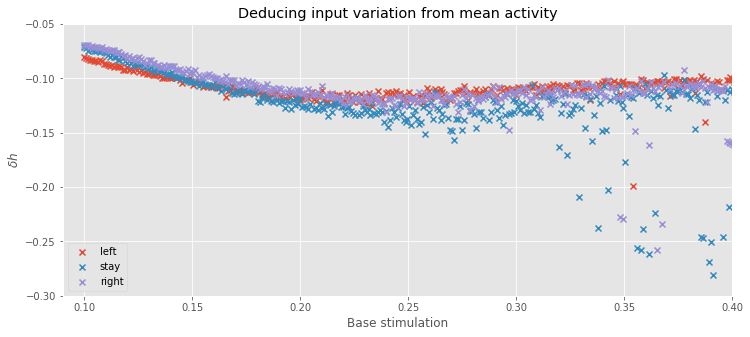

In [9]:
plt.figure(figsize=(12,5))
plt.xlabel('Base stimulation')
plt.ylabel(r'$\delta h$')
plt.title('Deducing input variation from mean activity')
plt.xlim(0.09,0.4)
plt.ylim(-0.3,-0.05)
plt.scatter(hExt0_list,np.array(data1)/50-hExt0_list, marker="x", label='left')
plt.scatter(hExt0_list,np.array(data2)/50-hExt0_list, marker="x", label='stay')
plt.scatter(hExt0_list,np.array(data3)/50-hExt0_list, marker="x", label='right')
plt.legend()
plt.show()

In [44]:
def get_accuracy(h0=0.27, batch=50,amb=False):
    print('hExt0:', h0)

    score = 0
    for i in range(batch):
        V1, V2, V3, Vt, aN, pW, p, pA  = combine_shifter_PCRN(W, num_samples=1,hExt0=h0,ambiguous=amb,verbose=False)
        if amb:
            if np.argmin(p) == np.argmin(V3[-1]):
                score += 1
            if (i+1)%5 == 0:
                print('Batch '+str(i+1)+'/'+str(batch)+' ('+str(score/(i+1)*100)+'%)')
        else:
            if np.argmax(p) == np.argmax(V3[-1]):
                score += 1
            if (i+1)%5 == 0:
                print('Batch '+str(i+1)+'/'+str(batch)+' ('+str(score/(i+1)*100)+'%)')
    print('Final score:',str(score/batch*100)+'%'+' ('+str(score)+'/'+str(batch)+')')
    print(10*'- ')
    return score/batch

In [45]:
data_plot = []
for h in np.linspace(0.10,0.40,20):
    acc = get_accuracy(h)
    data_plot.append(acc)

hExt0: 0.1
Batch 5/50 (40.0%)
Batch 10/50 (40.0%)
Batch 15/50 (40.0%)
Batch 20/50 (30.0%)
Batch 25/50 (32.0%)
Batch 30/50 (30.0%)
Batch 35/50 (28.57142857142857%)
Batch 40/50 (30.0%)
Batch 45/50 (28.888888888888886%)
Batch 50/50 (30.0%)
Final score: 30.0% (15/50)
- - - - - - - - - - 
hExt0: 0.11578947368421054
Batch 5/50 (20.0%)
Batch 10/50 (20.0%)
Batch 15/50 (26.666666666666668%)
Batch 20/50 (30.0%)
Batch 25/50 (28.000000000000004%)
Batch 30/50 (30.0%)
Batch 35/50 (28.57142857142857%)
Batch 40/50 (27.500000000000004%)
Batch 45/50 (26.666666666666668%)
Batch 50/50 (32.0%)
Final score: 32.0% (16/50)
- - - - - - - - - - 
hExt0: 0.13157894736842107
Batch 5/50 (60.0%)
Batch 10/50 (50.0%)
Batch 15/50 (60.0%)
Batch 20/50 (55.00000000000001%)
Batch 25/50 (60.0%)
Batch 30/50 (53.333333333333336%)
Batch 35/50 (51.42857142857142%)
Batch 40/50 (52.5%)
Batch 45/50 (55.55555555555556%)
Batch 50/50 (54.0%)
Final score: 54.0% (27/50)
- - - - - - - - - - 
hExt0: 0.1473684210526316
Batch 5/50 (40.0%)


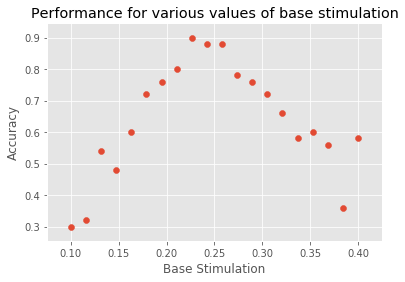

In [48]:
plt.figure()
x = np.linspace(0.10,0.40,20)
plt.xlabel('Base Stimulation')
plt.ylabel('Accuracy')
plt.title('Performance for various values of base stimulation')
plt.scatter(x,data_plot)
plt.show()

0.17
Deleted samples 0
[0, 2]


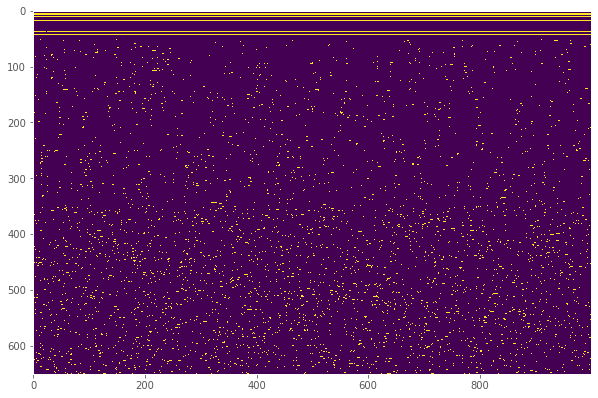

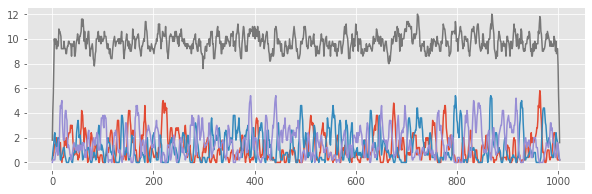

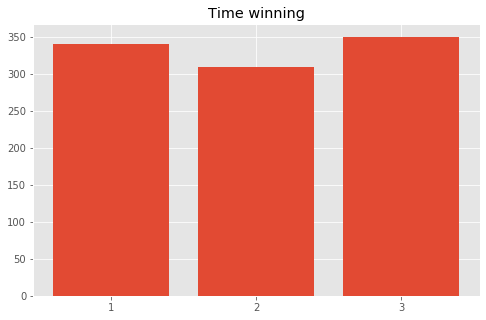

Mean activation when winning: 3.046359862777025
mean win / hExt0: 17.919763898688384
[1. 0. 1.]
--------------------
0.19
Deleted samples 0
[0, 2]


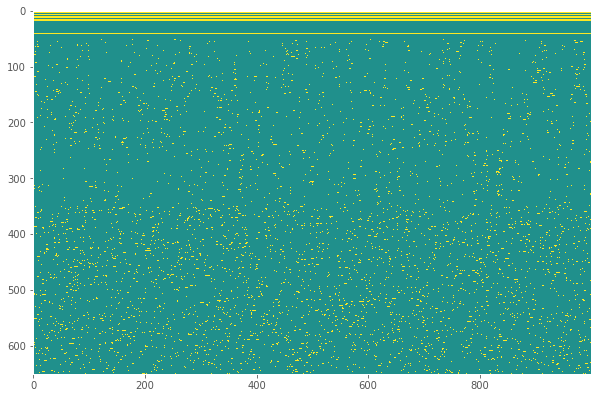

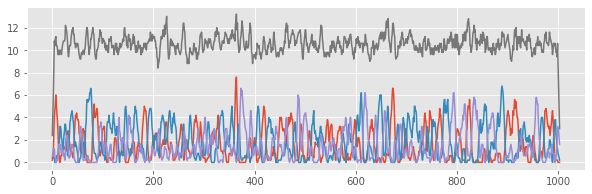

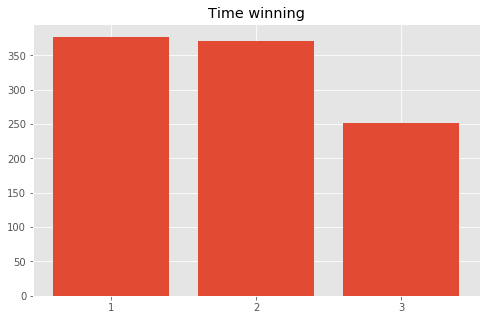

Mean activation when winning: 3.774655896646788
mean win / hExt0: 19.866609982351516
[1. 0. 1.]
--------------------
0.21000000000000002
Deleted samples 0
[0, 2]


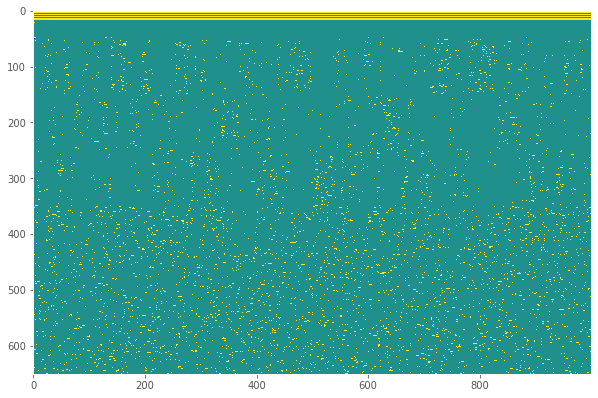

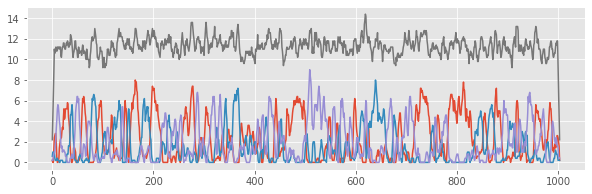

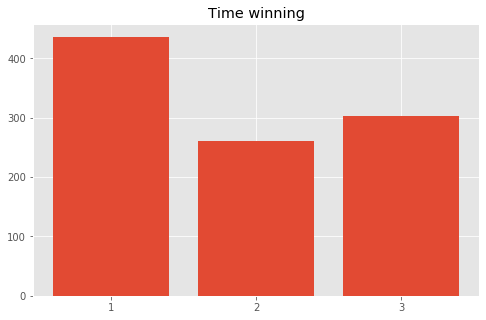

Mean activation when winning: 4.574975548277172
mean win / hExt0: 21.785597848938913
[1. 0. 1.]
--------------------
0.23
Deleted samples 0
[0, 2]


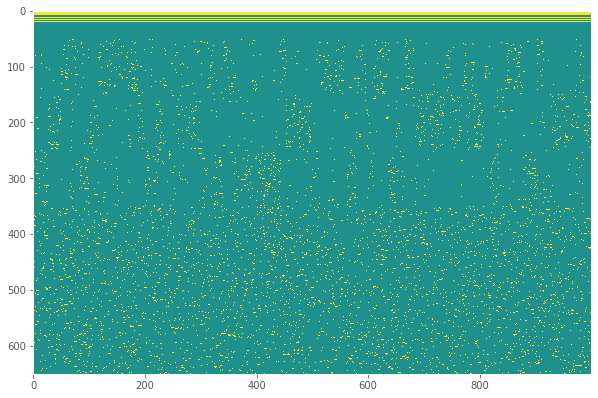

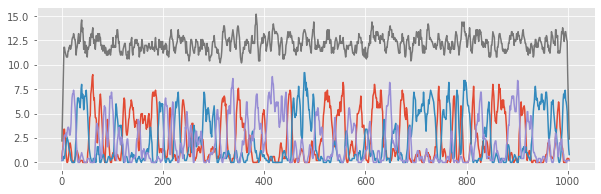

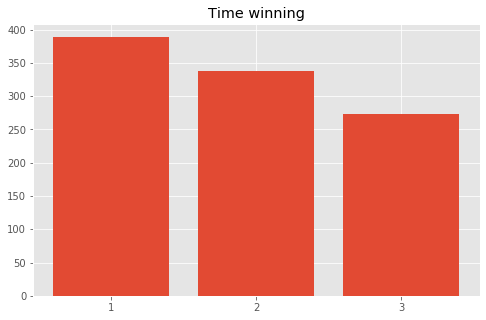

Mean activation when winning: 5.39919315408736
mean win / hExt0: 23.474752843858088
[1. 0. 1.]
--------------------
0.25
Deleted samples 0
[0, 2]


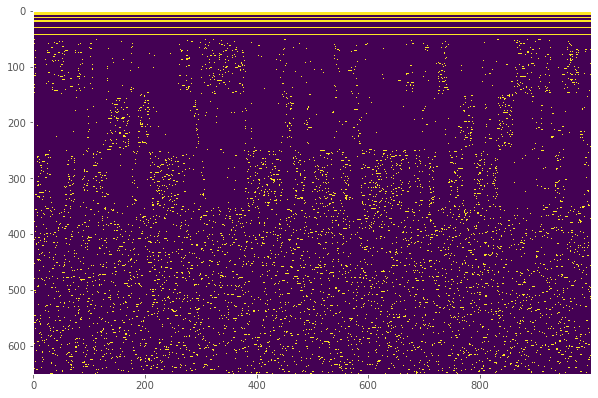

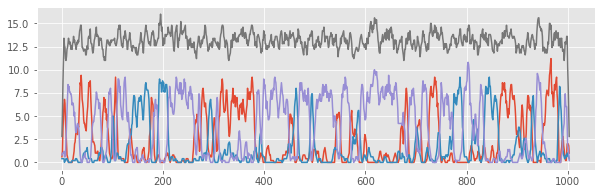

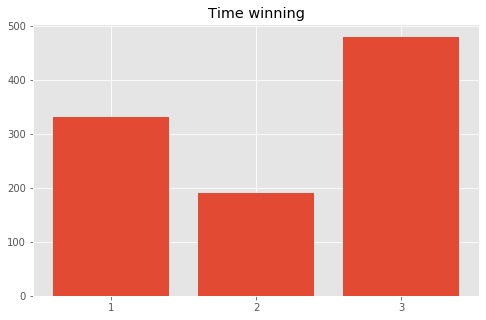

Mean activation when winning: 6.464976226841379
mean win / hExt0: 25.859904907365515
[1. 0. 1.]
--------------------
0.27
Deleted samples 0
[0, 2]


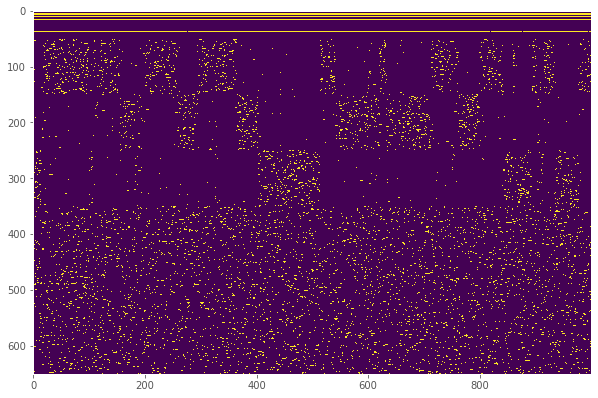

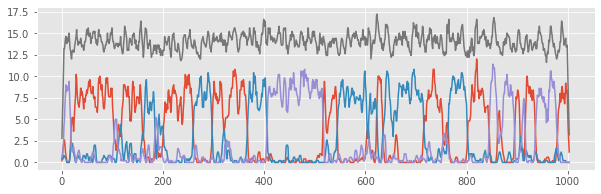

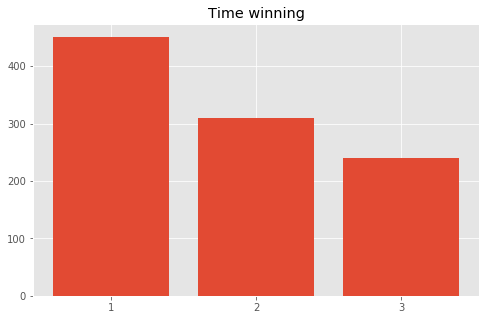

Mean activation when winning: 7.628084838438852
mean win / hExt0: 28.25216606829204
[1. 0. 1.]
--------------------
0.29000000000000004
Deleted samples 0
[0, 2]


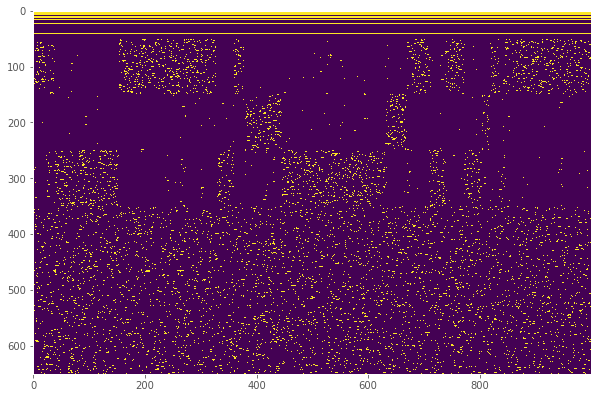

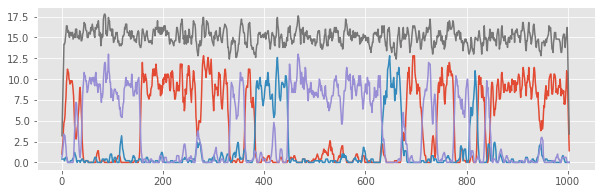

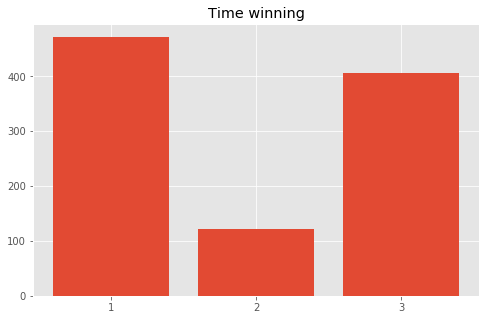

Mean activation when winning: 8.798039950582323
mean win / hExt0: 30.338068795111457
[1. 0. 1.]
--------------------
0.31
Deleted samples 0
[0, 2]


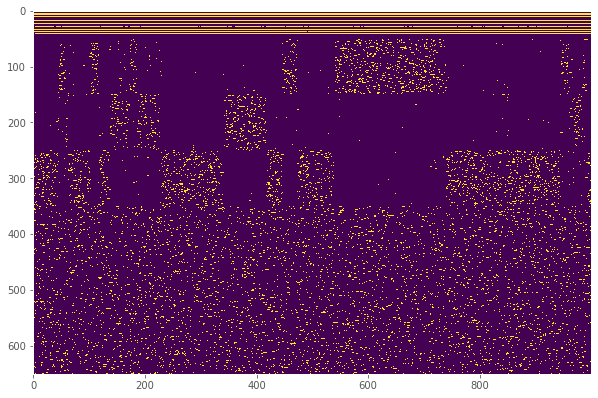

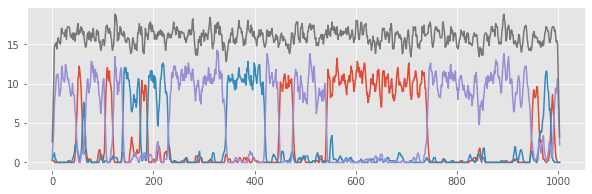

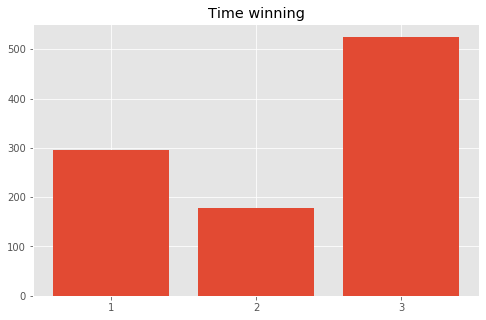

Mean activation when winning: 9.824606841478351
mean win / hExt0: 31.692280133801134
[1. 0. 1.]
--------------------
0.33
Deleted samples 0
[0, 2]


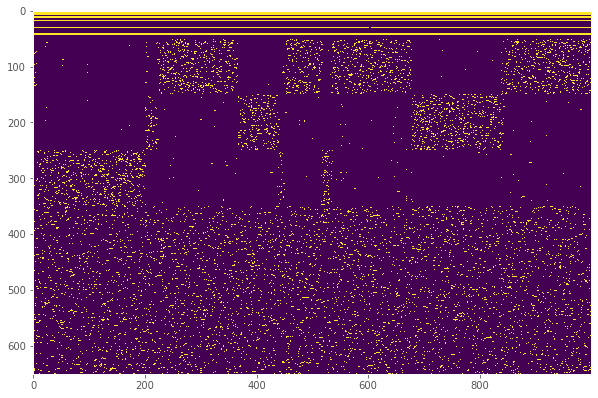

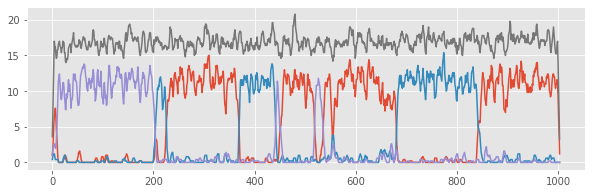

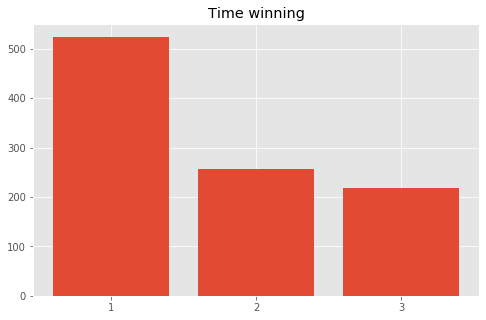

Mean activation when winning: 10.930911089130227
mean win / hExt0: 33.12397299736432
[1. 0. 1.]
--------------------
0.35000000000000003
Deleted samples 0
[0, 2]


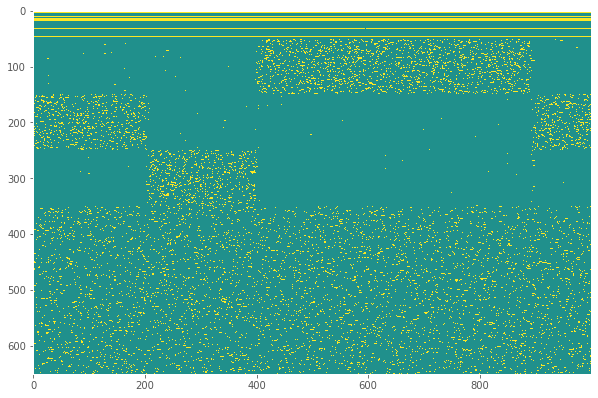

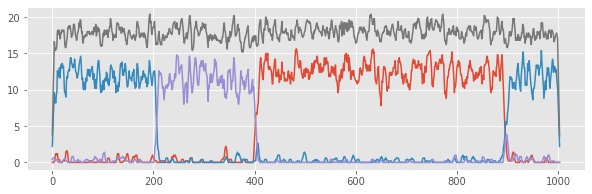

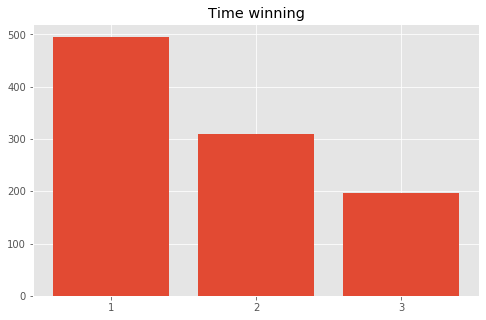

Mean activation when winning: 11.82144111346608
mean win / hExt0: 33.77554603847451
[1. 0. 1.]
--------------------


In [8]:
for i in range(10):
    print(str(0.27+(i-5)*0.02))
    test_h(h0=0.27+(i-5)*0.02,amb=True)

In [84]:
data_plot = []
for h in np.linspace(0.10,0.40,20):
    acc = get_accuracy(h,amb=True)
    data_plot.append(acc)

hExt0: 0.1
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Batch 5/50 (20.0%)
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Batch 10/50 (40.0%)
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Batch 15/50 (40.0%)
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Batch 20/50 (30.0%)
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Batch 25/50 (32.0%)
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Batch 30/50 (30.0%)
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0

Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Batch 15/50 (46.666666666666664%)
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Batch 20/50 (50.0%)
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Batch 25/50 (52.0%)
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Batch 30/50 (53.333333333333336%)
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Batch 35/50 (54.285714285714285%)
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Batch 40/50 (55.00000000000001%)
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]


Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Batch 25/50 (64.0%)
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Batch 30/50 (66.66666666666666%)
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Batch 35/50 (62.857142857142854%)
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Batch 40/50 (60.0%)
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Batch 45/50 (60.0%)
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Batch 50/50 (60.0%)
Final score: 60.0% (30/50)
- - - - - - - - - - 
hExt0: 0.27368421052631586
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Del

Deleted samples 0
[0, 2]
Batch 35/50 (51.42857142857142%)
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Batch 40/50 (50.0%)
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Batch 45/50 (48.888888888888886%)
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Batch 50/50 (54.0%)
Final score: 54.0% (27/50)
- - - - - - - - - - 
hExt0: 0.3526315789473685
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Batch 5/50 (60.0%)
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Batch 10/50 (50.0%)
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Deleted samples 0
[0, 2]
Batch

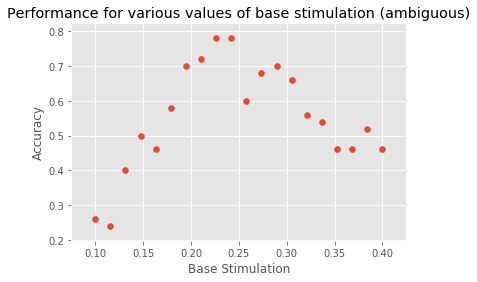

In [85]:
plt.figure()
x = np.linspace(0.10,0.40,20)
plt.xlabel('Base Stimulation')
plt.ylabel('Accuracy')
plt.title('Performance for various values of base stimulation (ambiguous)')
plt.scatter(x,data_plot)
plt.show()

In [90]:
hExt0_list = np.linspace(0.20,0.30,100)
data1 = []
data2 = []
data3 = []
for h in hExt0_list:
    test_h_quiet(h,amb=True)

Base stimulation: 0.2
Deleted samples 0
[0, 2]
Mean activations when winning: [4.07088608 4.08959538 4.39382239]
Prediction: 2 / Label: 1
--------------------
Base stimulation: 0.20101010101010103
Deleted samples 0
[0, 2]
Mean activations when winning: [4.38353414 4.40614334 4.20574163]
Prediction: 2 / Label: 1
--------------------
Base stimulation: 0.20202020202020204
Deleted samples 0
[0, 2]
Mean activations when winning: [4.0939759  4.37626263 4.32804233]
Prediction: 2 / Label: 1
--------------------
Base stimulation: 0.20303030303030303
Deleted samples 0
[0, 2]
Mean activations when winning: [4.24016563 4.28616352 4.17085427]
Prediction: 2 / Label: 1
--------------------
Base stimulation: 0.20404040404040405
Deleted samples 0
[0, 2]
Mean activations when winning: [4.31492843 4.33006536 4.26829268]
Prediction: 2 / Label: 1
--------------------
Base stimulation: 0.20505050505050507
Deleted samples 0
[0, 2]
Mean activations when winning: [4.19582245 4.38582677 4.34322034]
Prediction: 

Mean activations when winning: [6.10714286 6.61246612 6.23430962]
Prediction: 2 / Label: 1
--------------------
Base stimulation: 0.24848484848484848
Deleted samples 0
[0, 2]
Mean activations when winning: [6.41093117 6.42756184 6.41704036]
Prediction: 2 / Label: 1
--------------------
Base stimulation: 0.2494949494949495
Deleted samples 0
[0, 2]
Mean activations when winning: [6.4732334  6.56907895 6.48908297]
Prediction: 2 / Label: 1
--------------------
Base stimulation: 0.2505050505050505
Deleted samples 0
[0, 2]
Mean activations when winning: [6.51873767 6.75655431 6.15929204]
Prediction: 2 / Label: 1
--------------------
Base stimulation: 0.2515151515151515
Deleted samples 0
[0, 2]
Mean activations when winning: [6.63908046 6.33196721 6.59501558]
Prediction: 1 / Label: 1
--------------------
Base stimulation: 0.25252525252525254
Deleted samples 0
[0, 2]
Mean activations when winning: [6.4075     6.16959064 6.51162791]
Prediction: 2 / Label: 1
--------------------
Base stimulation

Mean activations when winning: [9.35911602 8.42982456 9.0308642 ]
Prediction: 1 / Label: 1
--------------------
Base stimulation: 0.295959595959596
Deleted samples 0
[0, 2]
Mean activations when winning: [9.29236499 8.97069597 9.22105263]
Prediction: 2 / Label: 1
--------------------
Base stimulation: 0.296969696969697
Deleted samples 0
[0, 2]
Mean activations when winning: [8.94909688 9.39694656 8.48062016]
Prediction: 2 / Label: 1
--------------------
Base stimulation: 0.29797979797979796
Deleted samples 0
[0, 2]
Mean activations when winning: [9.37540984 8.6958042  8.19230769]
Prediction: 2 / Label: 1
--------------------
Base stimulation: 0.298989898989899
Deleted samples 0
[0, 2]
Mean activations when winning: [9.29090909 9.41437632 9.43654822]
Prediction: 2 / Label: 1
--------------------
Base stimulation: 0.3
Deleted samples 0
[0, 2]
Mean activations when winning: [9.21428571 9.4159292  7.89655172]
Prediction: 2 / Label: 1
--------------------


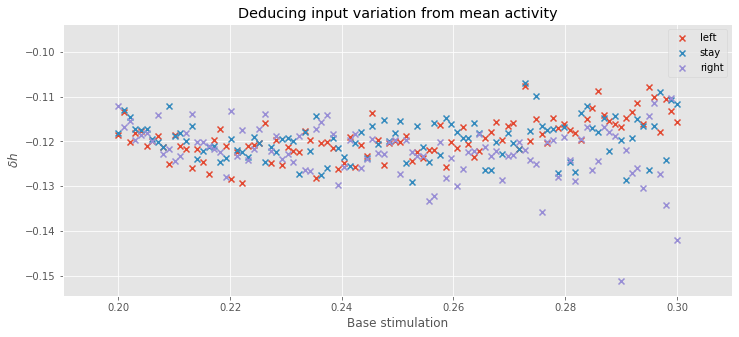

In [94]:
plt.figure(figsize=(12,5))
plt.xlabel('Base stimulation')
plt.ylabel(r'$\delta h$')
plt.title('Deducing input variation from mean activity')
# plt.xlim(0.20,0.25)
# plt.ylim(-0.14,-0.11)
plt.scatter(hExt0_list,np.array(data1)/50-hExt0_list, marker="x", label='left')
plt.scatter(hExt0_list,np.array(data2)/50-hExt0_list, marker="x", label='stay')
plt.scatter(hExt0_list,np.array(data3)/50-hExt0_list, marker="x", label='right')
plt.legend()
plt.show()